# ASSIGNMENT #6 - MODEL DATA #
Due: 21 April 2024 @ 11:59p

Purpose:\
The purpose of this assignment is to examine the netCDF data format using model data and plotting the output.  

Overview:\
In this assignment you will read in ECMWF ERA-40 Reanalysis netCDF4 and plot the data on a map.


| | UPDATE TO YOUR INFORMATION | 
| :- | :- |
| Created By | Jared W. Marquis |
| Creation Date | 21 January 2024 |
| Course | ATSC 270 - Computer Concepts in Meteorology |

In [1]:
### UPDATE TO YOUR INFORMATION ###
#information allowing anyone with the code to print the author and contact information
__author__    = "Jared W. Marquis"
__contact__   = "jared.marquis@und.edu"

### IMPORT REQUIRED LIBRARIES ###

In [2]:
import numpy as np
from datetime import datetime, timedelta
from netCDF4 import Dataset

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature

### OPEN NETCDF FILE ###

In [34]:
data = Dataset('ECMWF_ERA-40_subset.nc','r')

#analyze the variables and plot (on a map) SLP, 10-m winds, and total precipitation
lat = data.variables['latitude'][:]
long = data.variables['longitude'][:]

time = data.variables['time'][:]#hours since 1900-01-01 00:00:00
start_time = datetime(1900, 1, 1, 0, 0)
dts = np.empty(len(time), dtype=datetime)
for index, t in enumerate(time):
    dts[index] = start_time + timedelta(hours=int(t))
    
tp =data.variables['tp'][:]*1000
p10u = data.variables['p10u'][:]*1.94
p10v = data.variables['p10v'][:]*1.94
msl = data.variables['msl'][:]/100

print(dts)

[datetime.datetime(2002, 7, 1, 12, 0) datetime.datetime(2002, 7, 1, 18, 0)
 datetime.datetime(2002, 7, 2, 12, 0) datetime.datetime(2002, 7, 2, 18, 0)
 datetime.datetime(2002, 7, 3, 12, 0) datetime.datetime(2002, 7, 3, 18, 0)
 datetime.datetime(2002, 7, 4, 12, 0) datetime.datetime(2002, 7, 4, 18, 0)
 datetime.datetime(2002, 7, 5, 12, 0) datetime.datetime(2002, 7, 5, 18, 0)
 datetime.datetime(2002, 7, 6, 12, 0) datetime.datetime(2002, 7, 6, 18, 0)
 datetime.datetime(2002, 7, 7, 12, 0) datetime.datetime(2002, 7, 7, 18, 0)
 datetime.datetime(2002, 7, 8, 12, 0) datetime.datetime(2002, 7, 8, 18, 0)
 datetime.datetime(2002, 7, 9, 12, 0) datetime.datetime(2002, 7, 9, 18, 0)
 datetime.datetime(2002, 7, 10, 12, 0)
 datetime.datetime(2002, 7, 10, 18, 0)
 datetime.datetime(2002, 7, 11, 12, 0)
 datetime.datetime(2002, 7, 11, 18, 0)
 datetime.datetime(2002, 7, 12, 12, 0)
 datetime.datetime(2002, 7, 12, 18, 0)
 datetime.datetime(2002, 7, 13, 12, 0)
 datetime.datetime(2002, 7, 13, 18, 0)
 datetime.dat

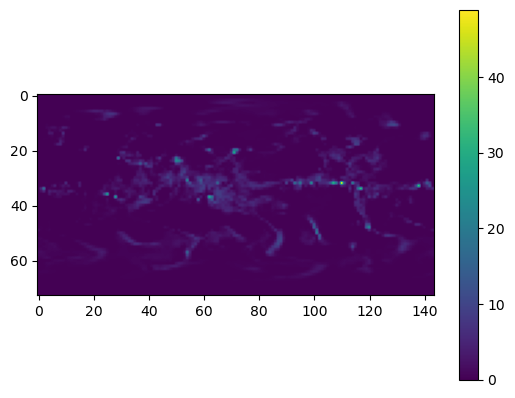

In [4]:
#total precip example
plt.imshow(tp[7])
plt.colorbar()


Text(0.5, 1.0, 'Sea Level Pressure, 10m Winds, Total Precip \n 12z July 1, 2002')

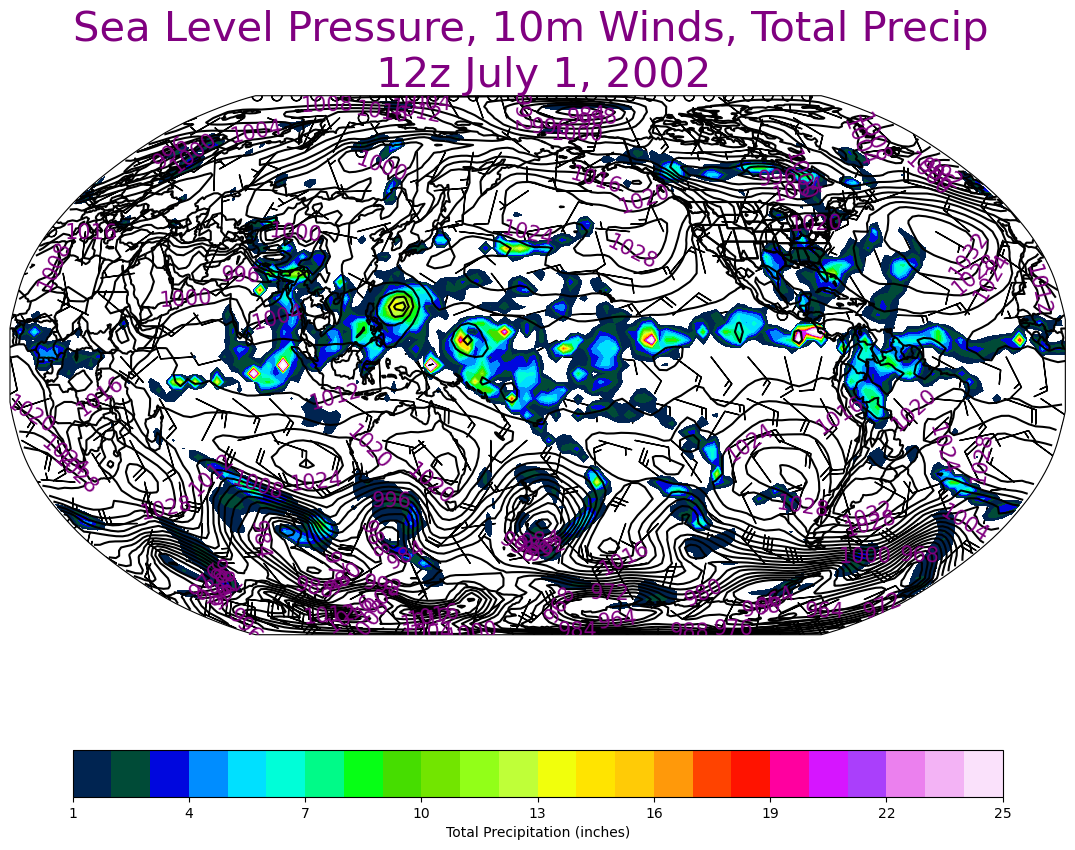

In [60]:
#Creating figure and projection
proj = ccrs.Robinson(central_longitude=-181)
fig = plt.figure(figsize=(20,10),dpi=100)
ax = plt.axes(projection = proj)


#Sea level pressure with contours at 12z (4mb step 1000mb baseline)
clevs = np.arange(964, 1100, 4)
cs = plt.contour(long, lat, msl[0], clevs, colors='k', transform = ccrs.PlateCarree())
#creating contour lables
ax.clabel(cs, inline=True, fontsize=15, colors='purple')



#10m winds
plt.barbs(long[::5], lat[::5], p10u[0, ::5, ::5], p10v[0, ::5, ::5], transform=ccrs.PlateCarree(), length=7)

#total precip
plt.contourf(long, lat, tp[1], cmap='gist_ncar', transform = ccrs.PlateCarree(), levels = np.arange(1, 26, 1))

#colorbar
plt.colorbar(location='bottom', shrink = .6, label='Total Precipitation (inches)')


ax.add_feature(cfeature.COASTLINE, linewidth=1.5)
ax.add_feature(cfeature.STATES, linewidth = 1.5)
ax.add_feature(cfeature.BORDERS, linewidth = 1.5)

#Titles
plt.title('Sea Level Pressure, 10m Winds, Total Precip \n 12z July 1, 2002', fontsize = 30, color = 'purple')